In [3]:
import numpy as np
import collections
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
filename = "./words_250000_train.txt"

word_dict = []
with open(filename, 'r') as f:
    for line in f:
        word = line.split()[0]
        if word.isalpha():
            word_dict.append(word)

words = list(np.random.permutation(list(word_dict)))

Based on Letter Frequency

In [10]:
common_letter_sorted = collections.Counter("".join(words)).most_common()


Text(0.5, 1.0, 'Letter Frequency')

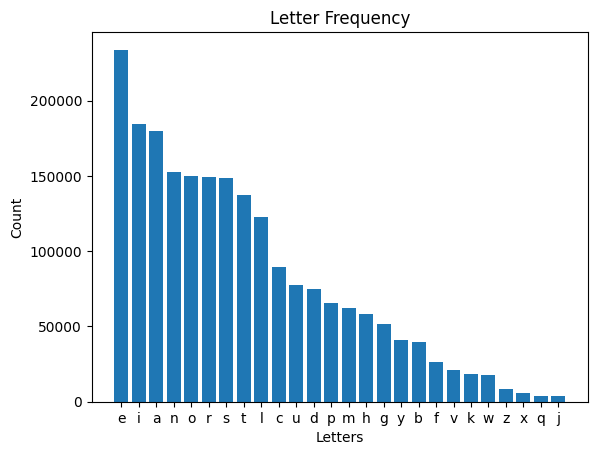

In [12]:
labels, values = zip(*common_letter_sorted)
plt.bar(labels, values)
plt.xlabel('Letters')
plt.ylabel('Count')
plt.title('Letter Frequency')

Based on Word Length

In [34]:
group_by_length = collections.Counter([len(word) for word in words]).most_common()

Text(0.5, 1.0, 'Length Count')

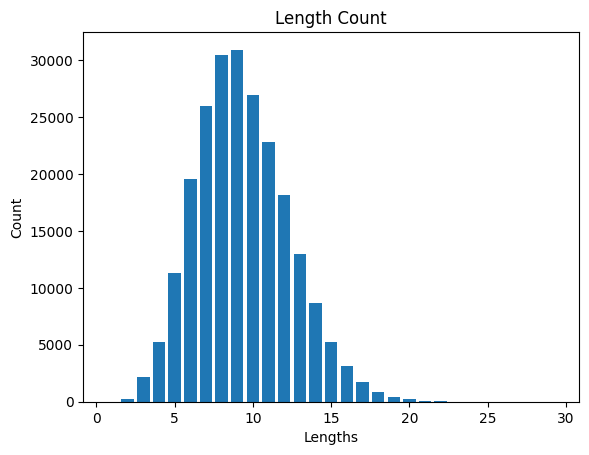

In [35]:
key, values = zip(*group_by_length)
plt.bar(key, values)
plt.xlabel('Lengths')
plt.ylabel('Count')
plt.title('Length Count')

2-Gram

In [5]:
def gen_n_gram(word, n):
        n_gram = []
        for i in range(n, len(word) + 1):
            if word[i-n:i] not in n_gram:
                
                n_gram.append(word[i-n:i])
        return n_gram
    
n_gram = {-1:[]}
for word in words:
    single_word_gram = gen_n_gram(word, 2)
    if len(word) not in n_gram:
        n_gram[len(word)] = single_word_gram
    else:
        n_gram[len(word)].extend(single_word_gram)

    n_gram[-1].extend(single_word_gram)
res = {}
for key in n_gram.keys():
    res[key] = collections.Counter(n_gram[key])

In [48]:
print(res[-1])

Counter({'er': 37539, 'in': 35657, 'ti': 26082, 'on': 25859, 'es': 25641, 'te': 25367, 'an': 24146, 're': 23777, 'at': 23105, 'al': 23019, 'ed': 22549, 'en': 22203, 'le': 21696, 'ri': 20474, 'ra': 20070, 'is': 20050, 'st': 19763, 'ic': 19720, 'ar': 19414, 'ne': 19126, 'li': 18929, 'ng': 18760, 'ro': 18308, 'or': 17108, 'nt': 16394, 'la': 14979, 'un': 14911, 'it': 14005, 'el': 13970, 'co': 13916, 'de': 13656, 'se': 13536, 'll': 13345, 'ca': 12814, 'ni': 12717, 'to': 12341, 'ta': 12170, 'io': 11939, 'ma': 11865, 'ch': 11758, 'ss': 11691, 'ia': 11596, 'ou': 11522, 'lo': 11490, 'he': 11476, 'tr': 11447, 'us': 11217, 'no': 11002, 'ly': 10990, 'me': 10948, 'si': 10929, 'di': 10862, 'ol': 10696, 'na': 10681, 'et': 10663, 'il': 10536, 'as': 10403, 've': 10352, 'ac': 10309, 'mi': 10255, 'th': 10171, 'pe': 10057, 'ea': 10050, 'nd': 9618, 'ha': 9443, 'om': 9265, 'os': 8891, 'hi': 8889, 'ce': 8800, 'ur': 8675, 'ho': 8604, 'pr': 8434, 'ph': 8399, 'ns': 8251, 'ie': 8221, 'id': 8135, 'op': 8018, 'ul'

Text(0.5, 1.0, '2-Gram frequency')

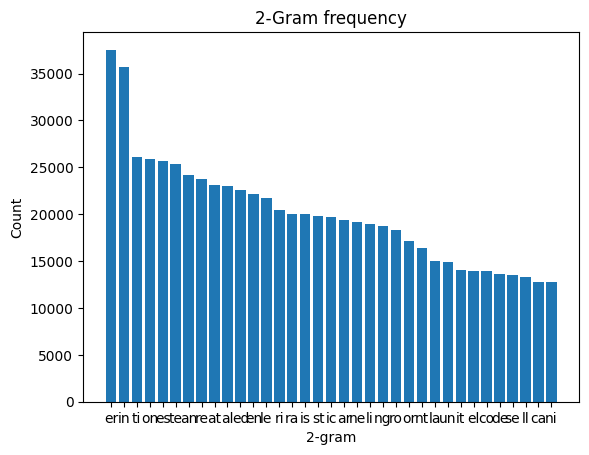

In [56]:

key, values = zip(*res[-1][:35])

plt.bar(key, values)
plt.xlabel('2-gram')
plt.ylabel('Count')
plt.title('2-Gram frequency')

In [62]:
print(res[-1])

[('er', 37539), ('in', 35657), ('ti', 26082), ('on', 25859), ('es', 25641), ('te', 25367), ('an', 24146), ('re', 23777), ('at', 23105), ('al', 23019), ('ed', 22549), ('en', 22203), ('le', 21696), ('ri', 20474), ('ra', 20070), ('is', 20050), ('st', 19763), ('ic', 19720), ('ar', 19414), ('ne', 19126), ('li', 18929), ('ng', 18760), ('ro', 18308), ('or', 17108), ('nt', 16394), ('la', 14979), ('un', 14911), ('it', 14005), ('el', 13970), ('co', 13916), ('de', 13656), ('se', 13536), ('ll', 13345), ('ca', 12814), ('ni', 12717), ('to', 12341), ('ta', 12170), ('io', 11939), ('ma', 11865), ('ch', 11758), ('ss', 11691), ('ia', 11596), ('ou', 11522), ('lo', 11490), ('he', 11476), ('tr', 11447), ('us', 11217), ('no', 11002), ('ly', 10990), ('me', 10948), ('si', 10929), ('di', 10862), ('ol', 10696), ('na', 10681), ('et', 10663), ('il', 10536), ('as', 10403), ('ve', 10352), ('ac', 10309), ('mi', 10255), ('th', 10171), ('pe', 10057), ('ea', 10050), ('nd', 9618), ('ha', 9443), ('om', 9265), ('os', 8891)

3-Gram

In [14]:
n_gram = {-1:[]}
for word in words:
    single_word_gram = gen_n_gram(word, 3)
    if len(word) not in n_gram:
        n_gram[len(word)] = single_word_gram
    else:
        n_gram[len(word)].extend(single_word_gram)

    n_gram[-1].extend(single_word_gram)
res = {}
for key in n_gram.keys():
    res[key] = collections.Counter(n_gram[key])

In [9]:
res[-1] = res[-1].most_common()

In [21]:
res[-1]["ize"]

2646

Text(0.5, 1.0, '3-Gram frequency')

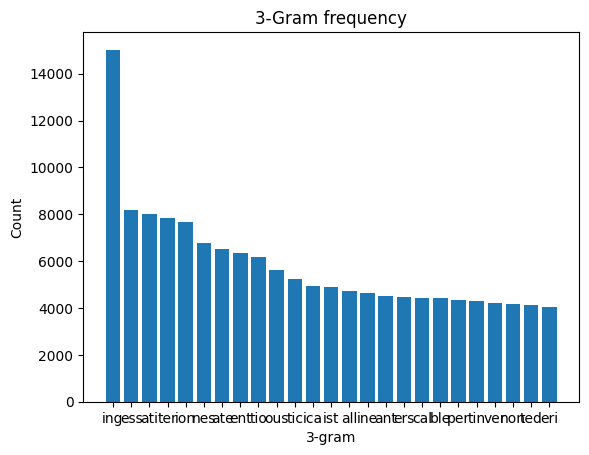

In [12]:
key, values = zip(*res[-1][:25])

plt.bar(key, values)
plt.xlabel('3-gram')
plt.ylabel('Count')
plt.title('3-Gram frequency')